<a href="https://colab.research.google.com/github/codingniket/30-ML-projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data")

Skipping, found downloaded files in "./gold-price-data" (use force=True to force download)


# Description

```
# Data collection and processing
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/gold-price-data/gld_price_data.csv")

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding Correlation
1. Positive
2. Negative

In [ ]:
correlation = df.corr(numeric_only=True)
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


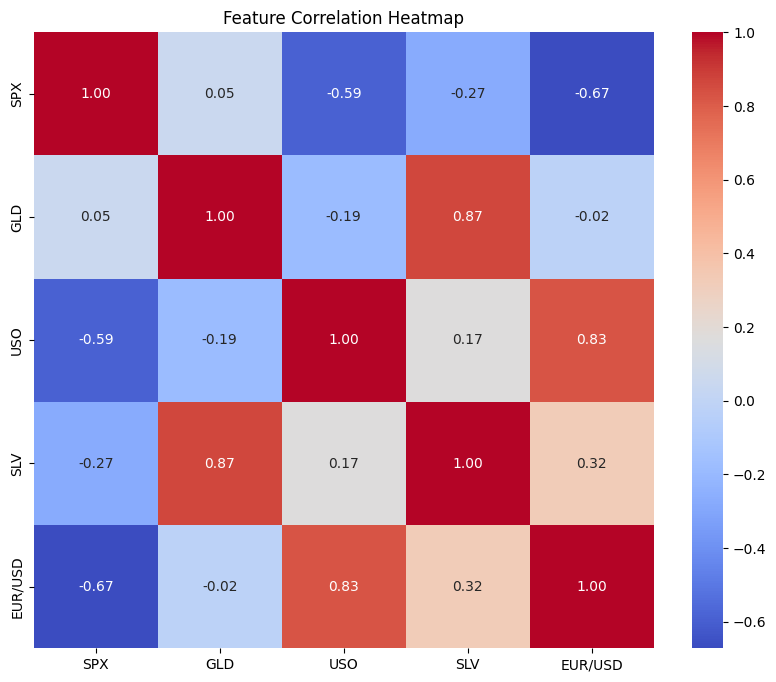

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust size for better readability
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()


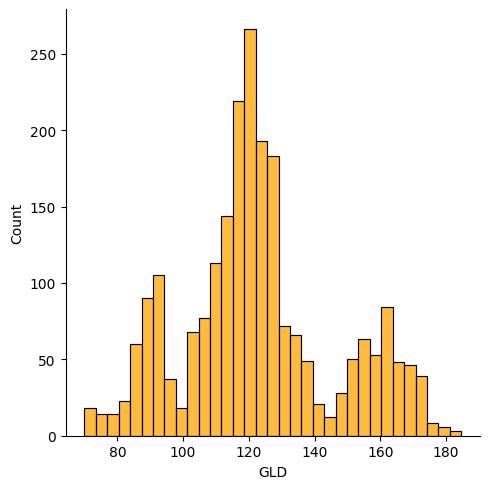

In [ ]:
sns.displot(df['GLD'],color='orange')

In [ ]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
data_pre = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test, data_pre))
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, data_pre))
print("R² Score:", r2_score(Y_test, data_pre))

Mean Absolute Error (MAE): 1.3313251220742324
Mean Squared Error (MSE): 5.594394379445272
R² Score: 0.9893933769730544


In [ ]:
error_score = metrics.r2_score(Y_test,data_pre)

In [ ]:
error_score

0.9893933769730544

In [ ]:
Y_test = list(Y_test)

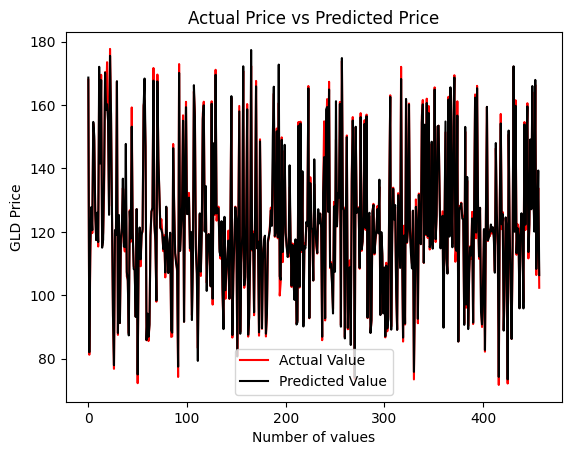

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(data_pre, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()